In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')

In [4]:
# Data Preprocessing

# Merge the datasets on CustomerID
df = pd.merge(transactions, customers, on='CustomerID')

In [6]:
# Aggregate transaction data by CustomerID (e.g., total spend, frequency of transactions, recency)
customer_data = df.groupby('CustomerID').agg(
    total_spend=('Price', 'sum'),
    transaction_count=('TransactionID', 'count'),
    recency=('TransactionDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x.max())).days)
).reset_index()
print(customer_data.head())

  CustomerID  total_spend  transaction_count  recency
0      C0001      1391.67                  5       85
1      C0002       835.68                  4       54
2      C0003       782.83                  4      154
3      C0004      1925.09                  8       34
4      C0005       874.81                  3       83


In [8]:
# Merge with customer profile data (Region, SignupDate)
customer_data = pd.merge(customer_data, customers[['CustomerID', 'Region']], on='CustomerID')
print(customer_data)

    CustomerID  total_spend  transaction_count  recency       Region_x  \
0        C0001      1391.67                  5       85  South America   
1        C0002       835.68                  4       54           Asia   
2        C0003       782.83                  4      154  South America   
3        C0004      1925.09                  8       34  South America   
4        C0005       874.81                  3       83           Asia   
..         ...          ...                ...      ...            ...   
194      C0196      1667.97                  4       42         Europe   
195      C0197       681.17                  3       29         Europe   
196      C0198       479.41                  2      113         Europe   
197      C0199      1002.44                  4       92         Europe   
198      C0200      1482.53                  5       46           Asia   

          Region_y  
0    South America  
1             Asia  
2    South America  
3    South America  
4     

In [10]:
# Feature Scaling
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spend', 'transaction_count', 'recency']])
print(customer_data_scaled)


[[ 0.03332559 -0.01145819 -0.25679067]
 [-0.80691867 -0.46749414 -0.69500411]
 [-0.88678865 -0.46749414  0.71858766]
 [ 0.83946076  1.35664965 -0.97772247]
 [-0.74778315 -0.92353008 -0.2850625 ]
 [-0.06268462 -0.46749414  0.11074319]
 [-0.48293521 -0.92353008  0.71858766]
 [ 1.42357704  2.26872154 -0.89290696]
 [-0.71500397 -0.92353008  0.04006361]
 [-1.14332467 -0.46749414 -0.46882943]
 [ 0.14133519 -0.01145819 -1.02013022]
 [ 0.79487865  0.9006137  -1.0059943 ]
 [ 1.32372823  0.9006137  -0.27092658]
 [-1.82905792 -1.83560198  3.82848955]
 [-0.99446577 -1.37956603  0.33691788]
 [ 0.88730718 -0.01145819 -0.38401393]
 [ 0.65990821  1.35664965 -0.6808682 ]
 [-0.14799513 -0.01145819  1.01544193]
 [ 0.11210746  0.44457776 -0.34160617]
 [-1.60518018 -1.83560198  3.65885854]
 [ 1.66085963  1.35664965  0.04006361]
 [ 0.46361093  0.44457776  0.39346155]
 [ 1.5076332   0.44457776 -0.38401393]
 [ 1.08296974  0.9006137   0.29451012]
 [-0.9639837  -0.46749414  0.87408275]
 [-0.16016075 -0.46749414

In [11]:
# Choose the number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

In [12]:

# Calculate Davies-Bouldin Index (DB Index) for evaluation
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9027609719929321


In [15]:
# Visualization: PCA to reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data_scaled)
print(pca_components)


[[ 1.27033754e-01 -2.21474966e-01]
 [-4.99652905e-01 -1.03320210e+00]
 [-1.17417799e+00  2.04975112e-01]
 [ 1.82784367e+00 -2.10022284e-01]
 [-9.35335774e-01 -7.70265414e-01]
 [-3.87484895e-01 -5.08568079e-02]
 [-1.21203557e+00  2.21453404e-01]
 [ 2.74136087e+00  3.20424770e-01]
 [-1.05831088e+00 -4.67571507e-01]
 [-8.11092412e-01 -9.48432098e-01]
 [ 5.32077528e-01 -8.67368902e-01]
 [ 1.52046952e+00 -3.75914973e-01]
 [ 1.52840606e+00  4.67692420e-01]
 [-4.01566092e+00  2.28563783e+00]
 [-1.65697973e+00 -4.24507937e-01]
 [ 7.20254241e-01 -3.63528021e-02]
 [ 1.58382790e+00 -7.01270698e-03]
 [-5.48859688e-01  8.54557997e-01]
 [ 5.05858579e-01 -1.44896969e-01]
 [-3.79995770e+00  2.21210490e+00]
 [ 1.89489272e+00  9.89269454e-01]
 [ 4.02269502e-01  6.36601492e-01]
 [ 1.40217586e+00  3.05849977e-01]
 [ 1.12728376e+00  8.89835132e-01]
 [-1.29139556e+00  3.17216753e-01]
 [-4.36297634e-01 -1.10317202e-01]
 [-7.30705268e-01 -3.22688304e-01]
 [ 2.20508067e+00 -3.22143818e-02]
 [-3.60255447e-01 -1

In [14]:
# Add PCA components to the dataframe
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]
print(customer_data.head())

  CustomerID  total_spend  transaction_count  recency       Region_x  \
0      C0001      1391.67                  5       85  South America   
1      C0002       835.68                  4       54           Asia   
2      C0003       782.83                  4      154  South America   
3      C0004      1925.09                  8       34  South America   
4      C0005       874.81                  3       83           Asia   

        Region_y  Cluster      PCA1      PCA2  
0  South America        2  0.127034 -0.221475  
1           Asia        2 -0.499653 -1.033202  
2  South America        1 -1.174178  0.204975  
3  South America        0  1.827844 -0.210022  
4           Asia        2 -0.935336 -0.770265  


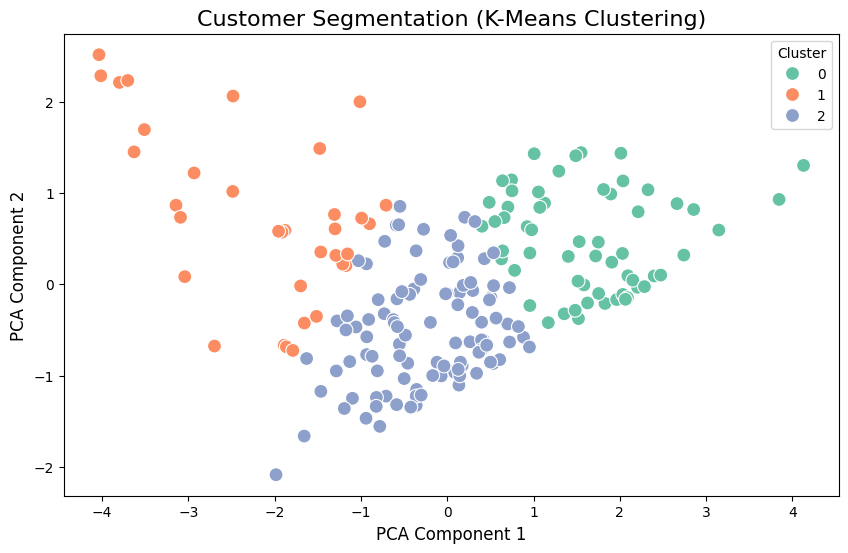

In [16]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=customer_data, s=100)
plt.title('Customer Segmentation (K-Means Clustering)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()